In [85]:
import numpy as np 
import pandas as pd
import random
import os
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/surface-roughness-dataset/roughness_values_avg.xlsx
/kaggle/input/surface-roughness-dataset/roughness_values_all.xlsx
/kaggle/input/surface-images/S2.jpg
/kaggle/input/surface-images/S14.jpg
/kaggle/input/surface-images/S12.jpg
/kaggle/input/surface-images/S15.jpg
/kaggle/input/surface-images/S7.jpg
/kaggle/input/surface-images/S6.jpg
/kaggle/input/surface-images/S8.jpg
/kaggle/input/surface-images/S16.jpg
/kaggle/input/surface-images/S5.jpg
/kaggle/input/surface-images/S1.jpg
/kaggle/input/surface-images/S9.jpg
/kaggle/input/surface-images/S10.jpg
/kaggle/input/surface-images/S11.jpg
/kaggle/input/surface-images/S3.jpg
/kaggle/input/surface-images/S4.jpg
/kaggle/input/surface-images/S13.jpg


In [86]:
df = pd.read_excel('/kaggle/input/surface-roughness-dataset/roughness_values_avg.xlsx')
df.head()

,sample_name,Ra,Rq,Rz
0,S1,29.703333,30.736667,90.853333
1,S2,26.595000,27.597500,81.315000
2,S3,24.220000,25.168000,73.528000
3,S4,30.130000,31.292500,101.380000
4,S5,25.468000,26.506000,75.432000


In [93]:
train_images = []
for sample_name in df['sample_name']:
    img = cv.imread(f'/kaggle/input/surface-images/{sample_name}.jpg')
    img = cv.resize(img, (280, 180), interpolation=cv.INTER_AREA)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    train_images.append(img)
train_images = np.array(train_images)/255

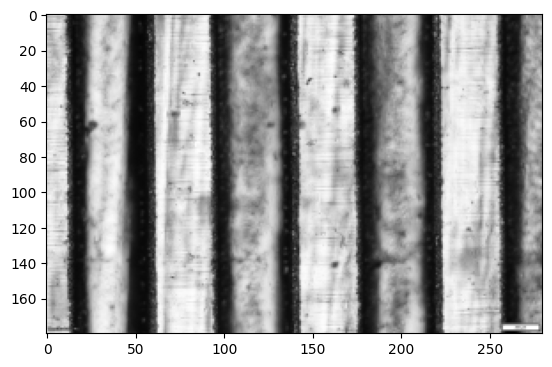

In [88]:
plt.imshow(train_images[0], cmap='gray')

In [94]:
train_labels_Ra = df['Ra']

In [95]:
test_images, test_labels = zip(*random.sample(list(zip(train_images, train_labels_Ra)), 5))

In [96]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [98]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 280, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [99]:
model.add(layers.Flatten())
model.add(layers.Dense(units=1, activation=None))

In [108]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(train_images, train_labels_Ra, epochs=20, batch_size=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 94.7740 - root_mean_squared_error: 9.3351 - val_loss: 112.8808 - val_root_mean_squared_error: 10.4094
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 64.7045 - root_mean_squared_error: 7.9773 - val_loss: 3.1139 - val_root_mean_squared_error: 1.6226
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 60.3875 - root_mean_squared_error: 7.7220 - val_loss: 48.4741 - val_root_mean_squared_error: 6.6838
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27.3436 - root_mean_squared_error: 5.1758 - val_loss: 3.1641 - val_root_mean_squared_error: 1.8344
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.0515 - root_mean_squared_error: 3.6955 - val_loss: 21.8703 - val_root_mean_squared_error: 4.3422
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.5924 - root_mean_squared_error: 3.3379 - val_loss: 3.2026 - val_root_mean_squared_error: 1.8360
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.9984 

In [109]:
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric], ls='dashed')
        ax[idx].set_xlabel('Epochs')
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history['val_'+metric]);
        ax[idx].legend(['train_'+metric, 'val_'+metric])

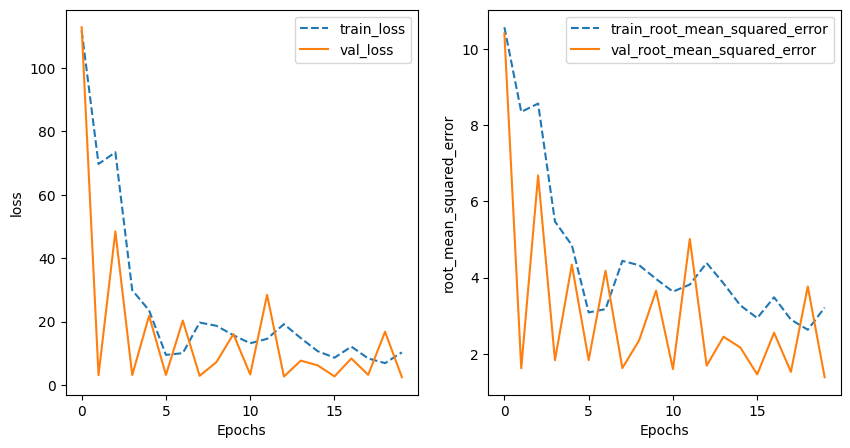

In [110]:
training_plot(['loss', 'root_mean_squared_error'], history)

In [125]:
img = cv.imread(f'/kaggle/input/surface-images/S2.jpg')
img = cv.resize(img, (280, 180), interpolation=cv.INTER_AREA)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = np.expand_dims(np.array(img/255), (0, 3))
img.shape

(1, 180, 280, 1)

In [126]:
model.predict(img)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


27.200094